In [3]:
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris 
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Regresión: Predicción de los precios de una casa:

Usaremos el dataset de los precios de casas en Bostón, para realizar la predicción.

El objetivo es obtener a la salida de la red neuronal un valor numérico del precio predicho en función de las caracteristicas de la tabla.

Definiremos un arquitectura de red con dos capas ocultas de 64 neuronas, usando una funcióón de activación **ReLu**, en cada una, y una capa de salida de una neurona, con una función de **activación lineal**:

In [4]:
from keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

# normalización de los datos
mean = train_data.mean(axis=0) # media de cada característica
train_data -= mean # resta la media a los datos de entrenamiento
std = train_data.std(axis=0) # desviación estándar de cada característica
train_data /= std # divide los datos de entrenamiento por la desviación estándar
test_data -= mean # resta la media a los datos de prueba
test_data /= std # divide los datos de prueba por la desviación estándar

#Función para la definición del modelo
from keras import models
from keras import layers
def build_model(): 
  model = models.Sequential() # modelo secuencial de Keras
  model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],))) 
  #Función de activación ReLU (Rectified Linear Unit), 64 neuronas en la capa oculta, 
  # 13 características de entrada, una por cada característica de los datos de entrada
  model.add(layers.Dense(64, activation='relu')) #Función de activación ReLU (Rectified Linear Unit), 64 neuronas en la capa oculta
  model.add(layers.Dense(1)) #Función de activación lineal en la capa de salida
  model.compile(optimizer='adam', loss='mse', metrics=['mae']) 
  #Función de pérdida MSE (Mean Squared Error) y métrica MAE (Mean Absolute Error)
  return model

In [5]:
# Creación del modelo
modelo = build_model()
modelo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                896       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


In [6]:
modelo.fit(train_data, train_targets, epochs=500, batch_size=16,validation_data=(test_data,test_targets)) 
#Entrenamiento del modelo con 500 épocas y un tamaño de lote de 16 muestras (batch_size) y 
# validación con los datos de prueba (test_data y test_targets)

# batch_size: número de muestras que se utilizarán en cada actualización del gradiente
# epochs: número de épocas para entrenar el modelo. Una época es una 
# iteración sobre todos los datos de entrenamiento
# validation_data: datos sobre los que se evaluará la pérdida y cualquier métrica del modelo al final de cada época


Epoch 1/500
26/26 [==============================] - 1s 10ms/step - loss: 535.4243 - mae: 21.0861 - val_loss: 507.2371 - val_mae: 20.4212
Epoch 2/500
26/26 [==============================] - 0s 3ms/step - loss: 407.9012 - mae: 17.6763 - val_loss: 331.8241 - val_mae: 16.0207
Epoch 3/500
26/26 [==============================] - 0s 3ms/step - loss: 215.2582 - mae: 11.9748 - val_loss: 126.4201 - val_mae: 9.3147
Epoch 4/500
26/26 [==============================] - 0s 3ms/step - loss: 78.5037 - mae: 6.4801 - val_loss: 62.6527 - val_mae: 6.0649
Epoch 5/500
26/26 [==============================] - 0s 3ms/step - loss: 47.8609 - mae: 5.0014 - val_loss: 40.7099 - val_mae: 4.9155
Epoch 6/500
26/26 [==============================] - 0s 3ms/step - loss: 33.7928 - mae: 4.1287 - val_loss: 31.1099 - val_mae: 4.3623
Epoch 7/500
26/26 [==============================] - 0s 3ms/step - loss: 27.4233 - mae: 3.6712 - val_loss: 26.9509 - val_mae: 4.0968
Epoch 8/500
26/26 [==============================] - 0s 3

In [7]:
test_mse_score, test_mae_score = modelo.evaluate(test_data, test_targets) #Evaluación del modelo con los datos de prueba (test_data y test_targets)

4/4 [==============================] - 0s 2ms/step - loss: 12.0135 - mae: 2.4252


In [8]:
modelo.evaluate(train_data,train_targets) 
#Evaluación del modelo con los datos de entrenamiento (train_data y train_targets) 
# para comparar con los datos de prueba (test_data y test_targets)

# evaluate devuelve la pérdida del modelo y cualquier métrica especificada en el argumento metrics

13/13 [==============================] - 0s 2ms/step - loss: 0.4678 - mae: 0.4951


[0.4677594304084778, 0.4951029121875763]

In [9]:
modelo.evaluate(test_data,test_targets) #Evaluación del modelo con los datos de prueba (test_data y test_targets) 

4/4 [==============================] - 0s 2ms/step - loss: 12.0135 - mae: 2.4252


[12.013534545898438, 2.425231695175171]

# Ejemplo 1: Clasificacion binaria 
objetivo : predecir si las personas tienen o no una enfermedad del corazon.

Importmeos algunas de las librerias que nos seran de utilidad

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

Primero importemos el dataset que se encuentran en Github

In [11]:
data = pd.read_csv('https://raw.githubusercontent.com/diplomado-bigdata-machinelearning-udea/Curso2/master/Datasets/heart.csv')

Inspeccionemos el dataset y sus características

In [12]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Contexto
Esta base de datos contiene 76 atributos, pero todos los experimentos publicados hacen referencia al uso de un subconjunto de 14 de ellos. En concreto, la base de datos Cleveland es la única que han utilizado los investigadores de ML hasta la fecha. El campo "meta" se refiere a la presencia de cardiopatía en el paciente. Tiene un valor entero comprendido entre 0 (sin presencia) y 4.

Contenido

Información sobre atributos:
Es un conjunto de datos limpio y fácil de entender. Sin embargo, el significado de algunos de los encabezados de columna no es obvio. He aquí lo que significan,

1. age: The person's age in years

2. sex: The person's sex (1 = male, 0 = female)

3. cp: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)

4. trestbps: The person's resting blood pressure (mm Hg on admission to the hospital)

5. chol: The person's cholesterol measurement in mg/dl

6. fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)

7. restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)

8. thalach: The person's maximum heart rate achieved

9. exang: Exercise induced angina (1 = yes; 0 = no)

10. oldpeak: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more here)

11. slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)

12. ca: The number of major vessels (0-3)

13. thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)

14. target: Heart disease (0 = no, 1 = yes)

The names and social security numbers of the patients were recently removed from the database, replaced with dummy values. One file has been "processed", that one containing the Cleveland database. All four unprocessed files also exist in this directory.

To see Test Costs (donated by Peter Turney), please see the folder "Costs"

Renombremos las columnas del dataset 


In [13]:
data.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']

Ahora procedamos a analizar un poco el dataset con algunos gráficos simples que nos darán una idea del problema

In [14]:
data.describe()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      303 non-null    int64  
 1   sex                      303 non-null    int64  
 2   chest_pain_type          303 non-null    int64  
 3   resting_blood_pressure   303 non-null    int64  
 4   cholesterol              303 non-null    int64  
 5   fasting_blood_sugar      303 non-null    int64  
 6   rest_ecg                 303 non-null    int64  
 7   max_heart_rate_achieved  303 non-null    int64  
 8   exercise_induced_angina  303 non-null    int64  
 9   st_depression            303 non-null    float64
 10  st_slope                 303 non-null    int64  
 11  num_major_vessels        303 non-null    int64  
 12  thalassemia              303 non-null    int64  
 13  target                   303 non-null    int64  
dtypes: float64(1), int64(13)
m

1    165
0    138
Name: target, dtype: int64


<Axes: xlabel='target', ylabel='count'>

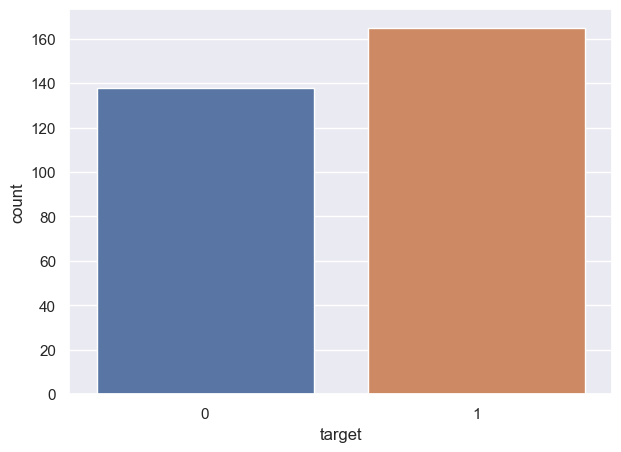

In [16]:
print(data.target.value_counts())
plt.figure(figsize=(7,5))
sns.countplot(x='target', data=data)

<Axes: xlabel='target', ylabel='st_depression'>

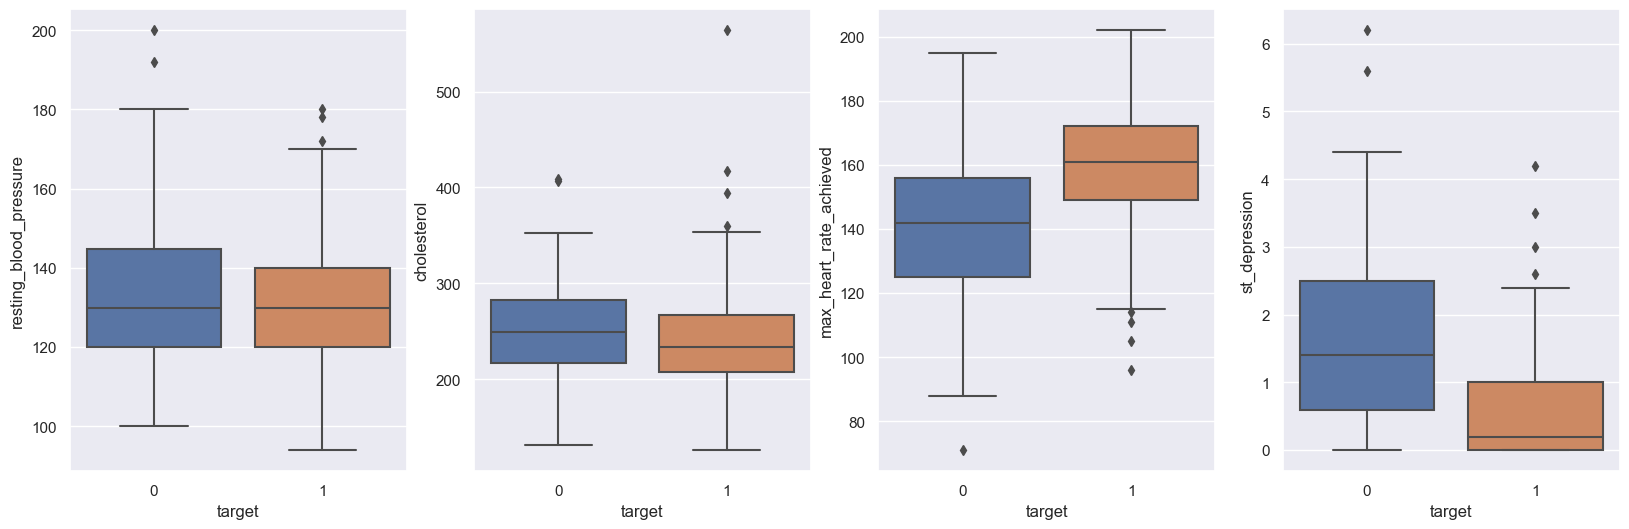

In [17]:
fig, ax = plt.subplots(1,4,figsize=(20,6))
sns.boxplot(x='target',y='resting_blood_pressure' ,data=data, ax=ax[0])
sns.boxplot(x='target',y='cholesterol' ,data=data,ax=ax[1])
sns.boxplot(x='target',y='max_heart_rate_achieved' ,data=data,ax=ax[2])
sns.boxplot(x='target',y='st_depression' ,data=data,ax=ax[3])

(14.5, -0.5)

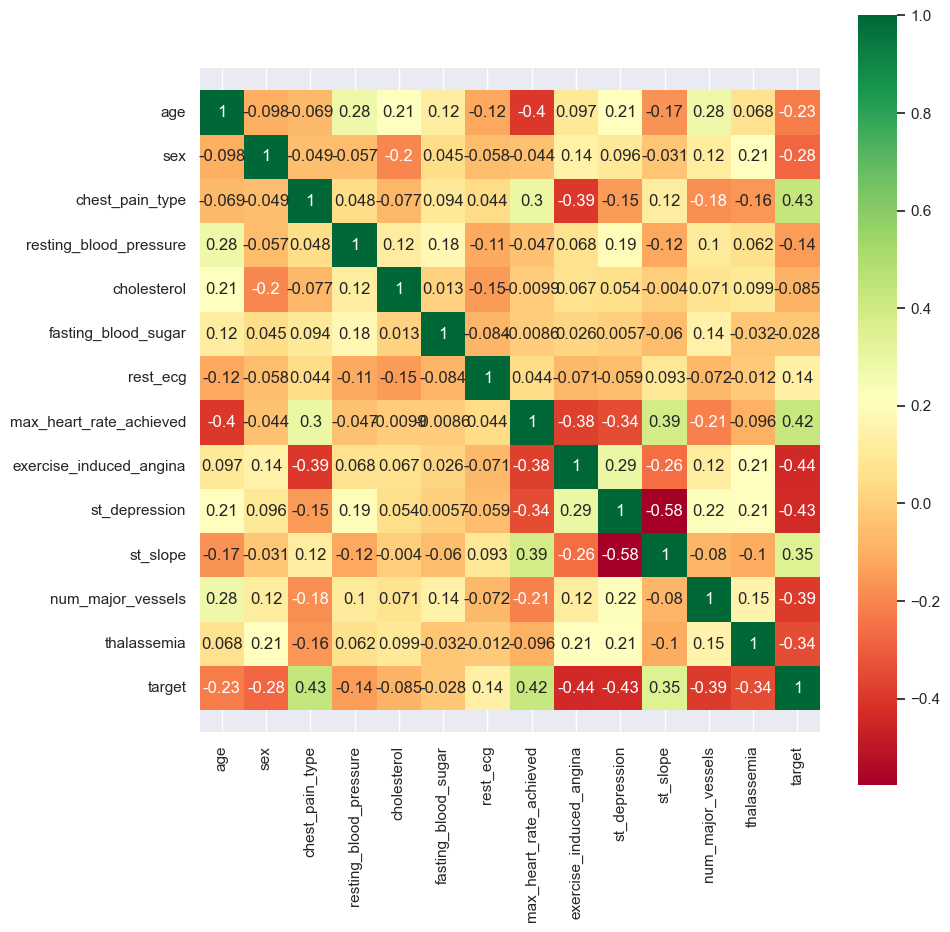

In [18]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn', square=True)
b, t = plt.ylim() 
b += 0.5  # Añadir 0.5 a la parte inferior
t -= 0.5  # Restar 0.5 a la parte superior
plt.ylim(b, t)

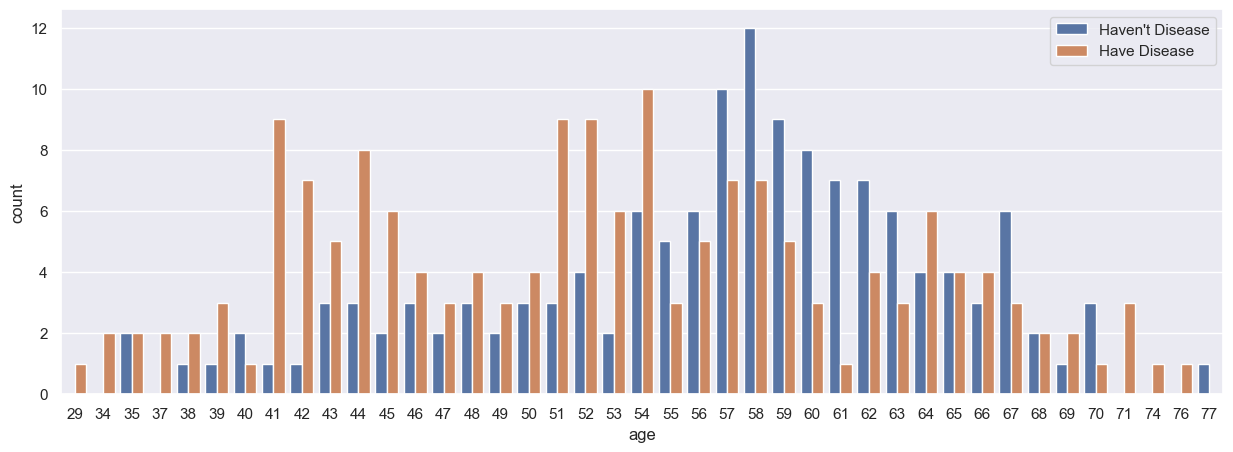

In [19]:
plt.figure(figsize=(15,5))
sns.countplot(x='age', data=data, hue='target')
plt.legend(["Haven't Disease", "Have Disease"],loc='upper right')

In [20]:
def plot_count_bar(feature):
  fig, ax = plt.subplots(1,2,figsize=(10,7))
  sns.countplot(x=feature, data=data, hue='target', ax=ax[0])
  ax[0].legend(["Haven't Disease", "Have Disease"],loc='best')
  sns.barplot(x=feature, y='target', data=data,ax=ax[1])

In [21]:
data['sex'] = data['sex'].map({0:'female', 1:'male'})

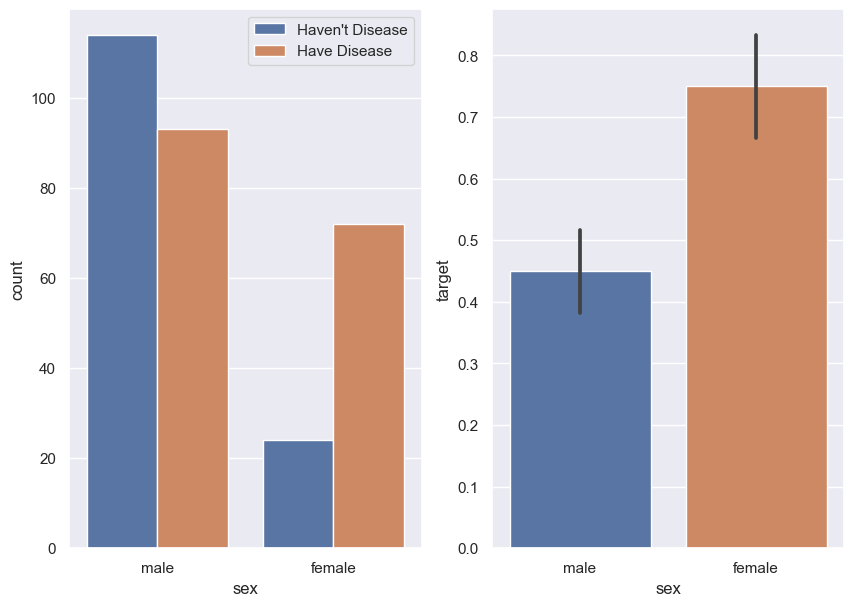

In [22]:
plot_count_bar('sex')

In [23]:
data['chest_pain_type'] = data['chest_pain_type'].map({0:'typical angina', 1:'atypical angina', 2:'non-anginal pain', 3:'asymptomatic'})

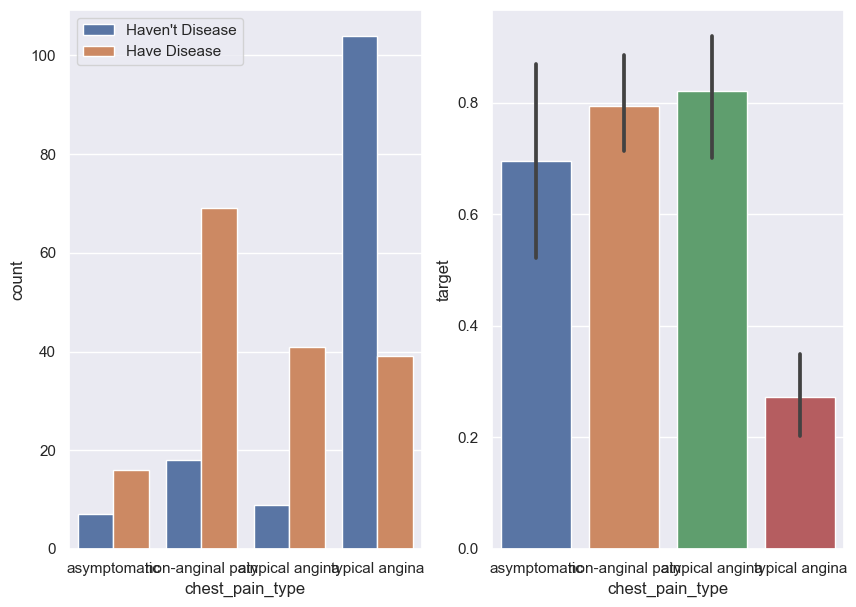

In [24]:
plot_count_bar('chest_pain_type')

In [25]:
data['fasting_blood_sugar'] = data['fasting_blood_sugar'].map({0:'lower than 120mg/ml',1:'greater than 120mg/ml'})

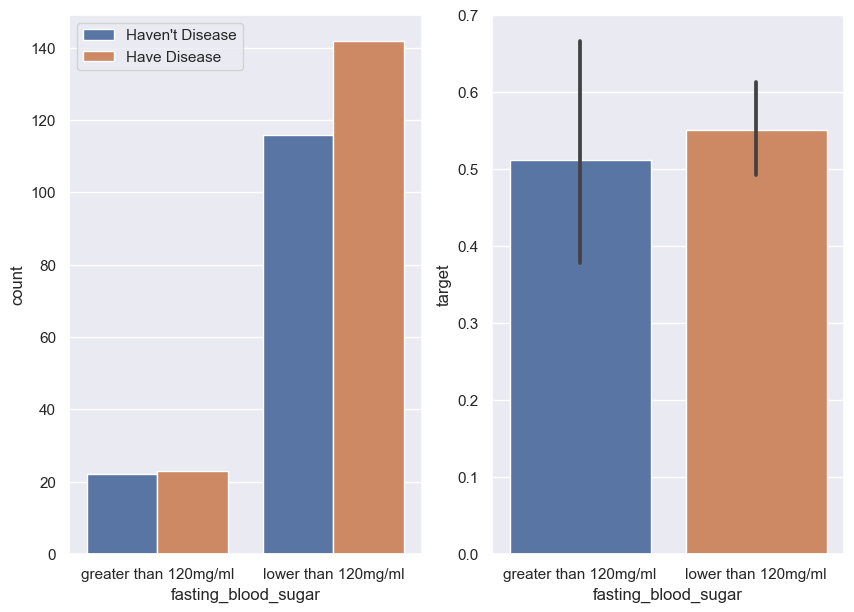

In [26]:
plot_count_bar('fasting_blood_sugar')

In [27]:
data['rest_ecg'] = data['rest_ecg'].map({0:'normal', 1 : 'ST-T abnormality', 2:'hypertrophy'})

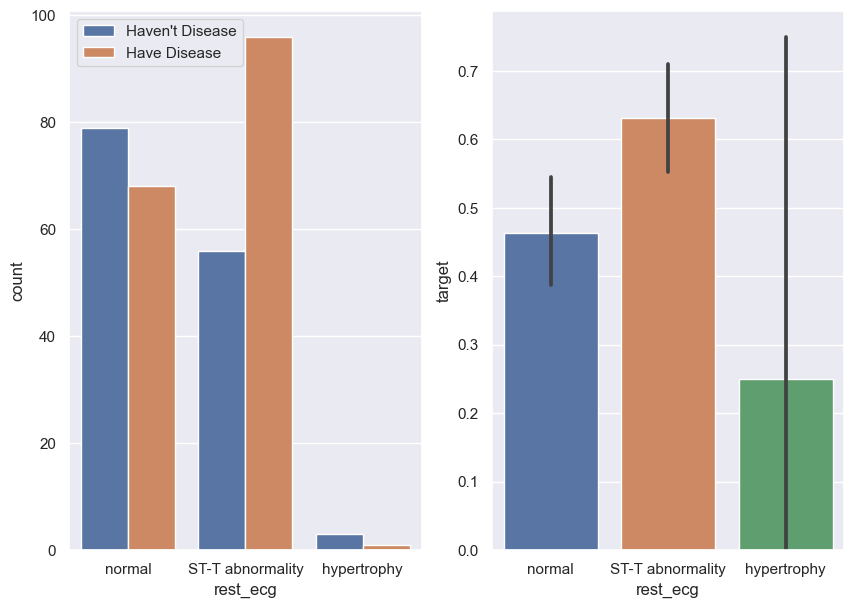

In [28]:
plot_count_bar('rest_ecg')

In [29]:
data['exercise_induced_angina'] = data['exercise_induced_angina'].map({0:'no', 1 : 'yes'})

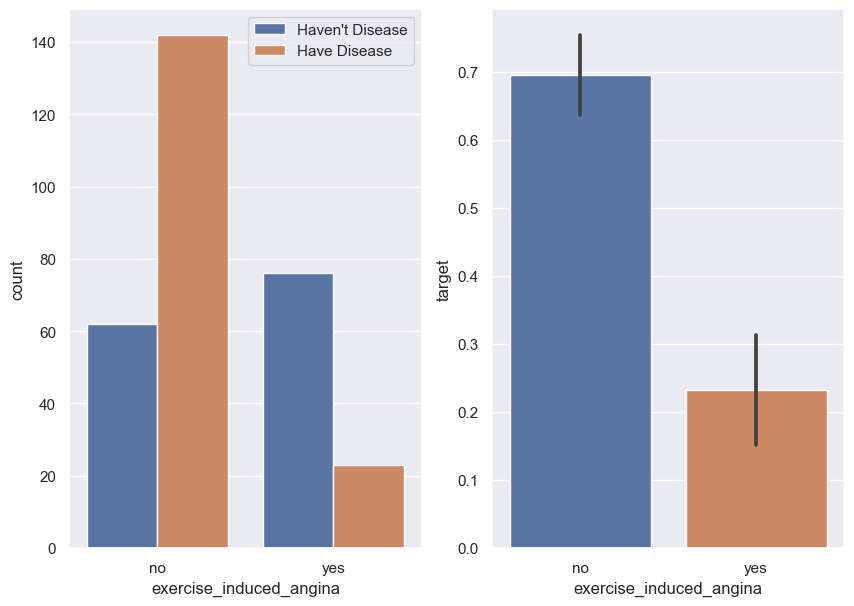

In [30]:
plot_count_bar('exercise_induced_angina')

In [31]:
data['st_slope'] = data['st_slope'].map({0: 'upsloping',  1: 'flat', 2: 'downsloping'})

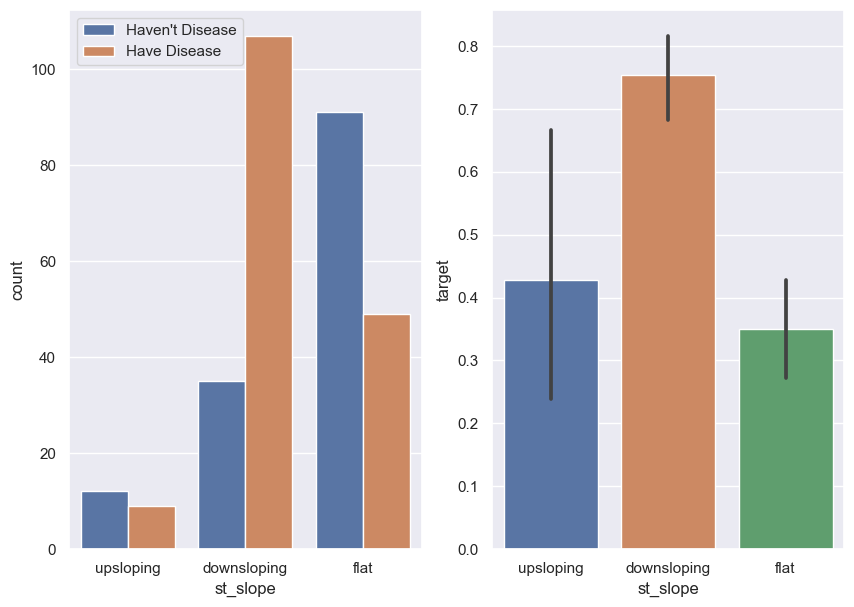

In [32]:
plot_count_bar('st_slope')

In [33]:
data['thalassemia'] = data['thalassemia'].map({1 :'normal', 2 : 'fixed defect', 3 :'reversable defect'})

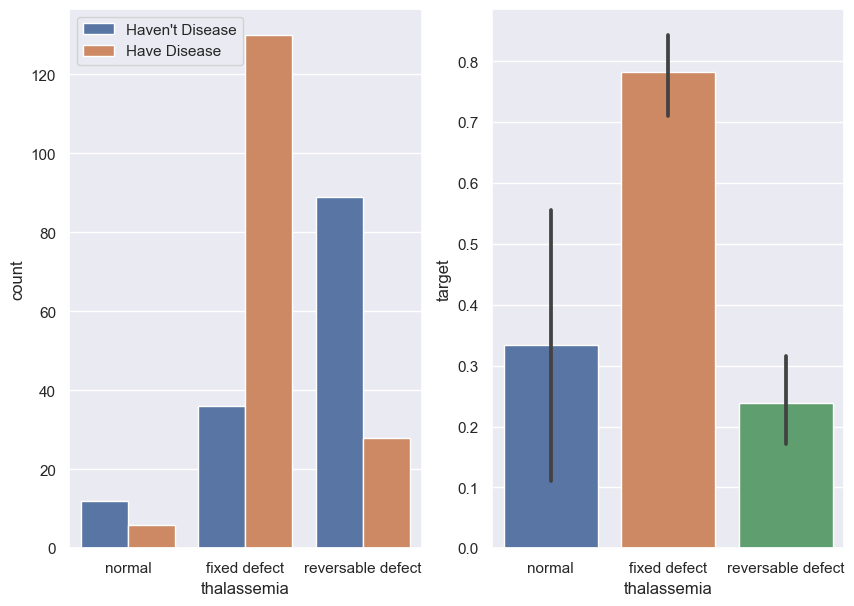

In [34]:
plot_count_bar('thalassemia')

In [35]:
data.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,male,asymptomatic,145,233,greater than 120mg/ml,normal,150,no,2.3,upsloping,0,normal,1
1,37,male,non-anginal pain,130,250,lower than 120mg/ml,ST-T abnormality,187,no,3.5,upsloping,0,fixed defect,1
2,41,female,atypical angina,130,204,lower than 120mg/ml,normal,172,no,1.4,downsloping,0,fixed defect,1
3,56,male,atypical angina,120,236,lower than 120mg/ml,ST-T abnormality,178,no,0.8,downsloping,0,fixed defect,1
4,57,female,typical angina,120,354,lower than 120mg/ml,ST-T abnormality,163,yes,0.6,downsloping,0,fixed defect,1


In [36]:
X=data.iloc[:,:-1]
y=data['target']

In [37]:
X=pd.get_dummies(X)

In [38]:
X.head()

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,num_major_vessels,sex_female,sex_male,chest_pain_type_asymptomatic,chest_pain_type_atypical angina,...,rest_ecg_hypertrophy,rest_ecg_normal,exercise_induced_angina_no,exercise_induced_angina_yes,st_slope_downsloping,st_slope_flat,st_slope_upsloping,thalassemia_fixed defect,thalassemia_normal,thalassemia_reversable defect
0,63,145,233,150,2.3,0,0,1,1,0,...,0,1,1,0,0,0,1,0,1,0
1,37,130,250,187,3.5,0,0,1,0,0,...,0,0,1,0,0,0,1,1,0,0
2,41,130,204,172,1.4,0,1,0,0,1,...,0,1,1,0,1,0,0,1,0,0
3,56,120,236,178,0.8,0,0,1,0,1,...,0,0,1,0,1,0,0,1,0,0
4,57,120,354,163,0.6,0,1,0,0,0,...,0,0,0,1,1,0,0,1,0,0


In [39]:
X.shape

(303, 25)

Creemos ahora un set de entrenamieto y otro de testeo

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [42]:
X_train.shape

(242, 25)

Recordemos como son implementados los pipelines usando sklearn. Para estos utilizareos el modelo de regression logistica

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import classification_report, confusion_matrix

In [44]:
model = Pipeline((
    ('scale', StandardScaler()), ('log_reg',LogisticRegression(C=10, solver='lbfgs', n_jobs=-1, fit_intercept=True))
))

In [45]:
model.fit(X_train,y_train)

Pipeline(steps=[('scale', StandardScaler()),
                ('log_reg', LogisticRegression(C=10, n_jobs=-1))])

In [46]:
y_fit=model.predict(X_test)

In [47]:
print(classification_report(y_test,y_fit))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90        29
           1       0.93      0.88      0.90        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



(2.5, -0.5)

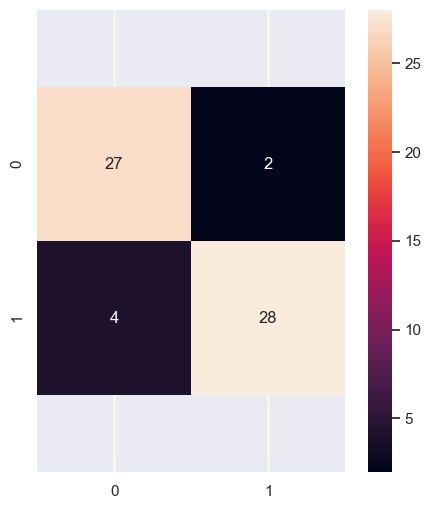

In [48]:
plt.figure(figsize=(6,6))
sns.heatmap(confusion_matrix(y_test,y_fit), annot=True, square=True)
b, t = plt.ylim() 
b += 0.5 
t -= 0.5 
plt.ylim(b, t)

<Axes: >

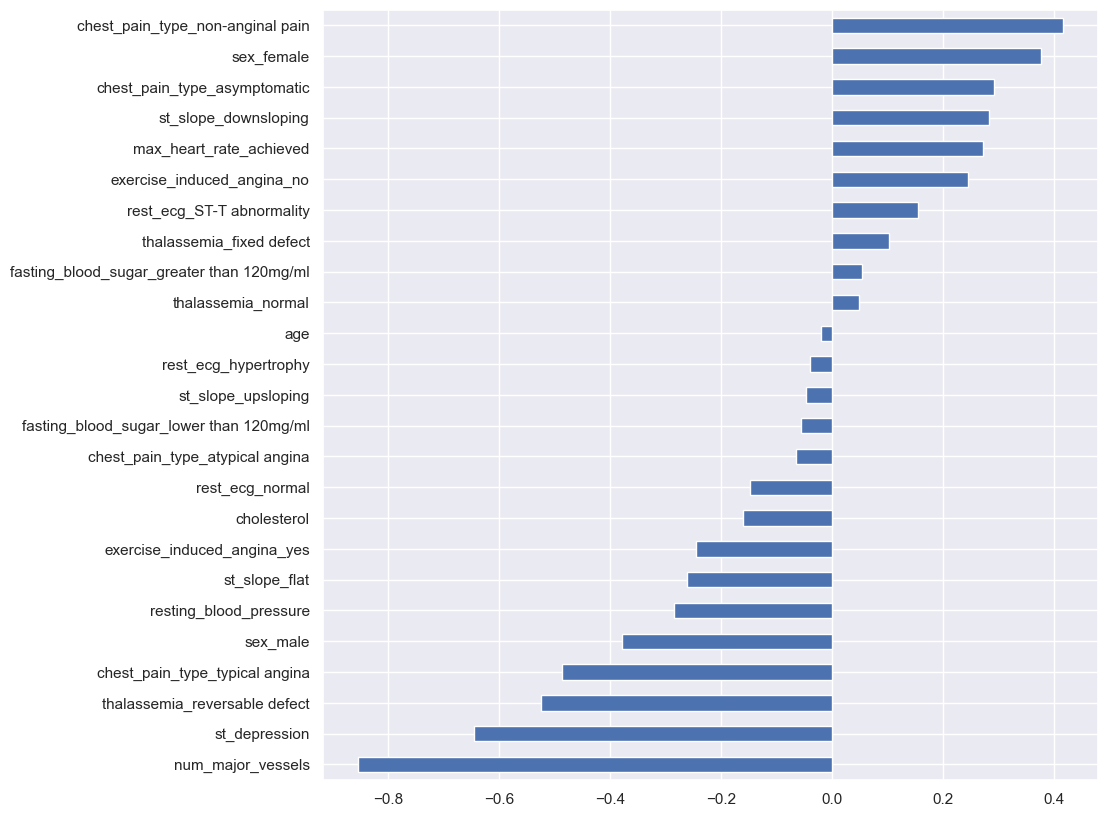

In [49]:
plt.figure(figsize=(10,10))
pd.Series((model[1].coef_[0]), index=X_train.columns).sort_values().plot(kind='barh')

Recordemos que además la búsqueda de hyperparameters puede automatizarse con sklearn usando `gridsearchcv` o `randomsearchcv`


In [50]:
from sklearn.model_selection import GridSearchCV

In [51]:
grid_params = {
    'log_reg__C':np.linspace(1,100,5),
    'log_reg__fit_intercept': [True,False]
}

In [52]:
grid_result = GridSearchCV(model, grid_params, n_jobs=-1, cv=5)

In [53]:
grid_result.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('log_reg',
                                        LogisticRegression(C=10, n_jobs=-1))]),
             n_jobs=-1,
             param_grid={'log_reg__C': array([  1.  ,  25.75,  50.5 ,  75.25, 100.  ]),
                         'log_reg__fit_intercept': [True, False]})

In [54]:
grid_result.best_params_

{'log_reg__C': 1.0, 'log_reg__fit_intercept': True}

In [55]:
model = grid_result.best_estimator_

In [56]:
y_fit=model.predict(X_test)
print(classification_report(y_test,y_fit))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90        29
           1       0.93      0.88      0.90        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



## Ahora usemos keras para crear un modelo de redes neururonales 

In [57]:
from tensorflow import keras

Antes de usar los pipelines en keras recordemso como hemos estado trabajando. primero debemos escalar los datos

In [58]:
from sklearn.preprocessing import StandardScaler

In [59]:
scale = StandardScaler()

In [60]:
X_train_scaled = scale.fit_transform(X_train)
X_test_scaled = scale.transform(X_test)

In [61]:
keras.backend.clear_session()

Ahora construyamos nuestra red neuronal de capas densas

In [62]:
model = keras.models.Sequential([
     keras.layers.Dense(5, activation='relu', input_shape = X_train.shape[1:]),    
     keras.layers.Dense(5, activation='relu'), 
     keras.layers.Dense(1 , activation='sigmoid')   
                             
])

pasemos a compilar el modelo

In [63]:
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

y finalmente entrenemos el modelo

In [64]:
model.fit(X_train_scaled,y_train, epochs=50, validation_split=0.2)

Epoch 1/50


7/7 [==============================] - 1s 38ms/step - loss: 0.8552 - accuracy: 0.2746 - val_loss: 0.7758 - val_accuracy: 0.4286
Epoch 2/50
7/7 [==============================] - 0s 7ms/step - loss: 0.8417 - accuracy: 0.2746 - val_loss: 0.7645 - val_accuracy: 0.4286
Epoch 3/50
7/7 [==============================] - 0s 7ms/step - loss: 0.8289 - accuracy: 0.2953 - val_loss: 0.7552 - val_accuracy: 0.4286
Epoch 4/50
7/7 [==============================] - 0s 7ms/step - loss: 0.8185 - accuracy: 0.2902 - val_loss: 0.7377 - val_accuracy: 0.3469
Epoch 5/50
7/7 [==============================] - 0s 7ms/step - loss: 0.8026 - accuracy: 0.2850 - val_loss: 0.7349 - val_accuracy: 0.3469
Epoch 6/50
7/7 [==============================] - 0s 7ms/step - loss: 0.7974 - accuracy: 0.2798 - val_loss: 0.7248 - val_accuracy: 0.3469
Epoch 7/50
7/7 [==============================] - 0s 7ms/step - loss: 0.7876 - accuracy: 0.2902 - val_loss: 0.7152 - val_accuracy: 0.3469
Epoch 8/50
7/7 [============================

In [ ]:
#y_fit = model.predict_classes(X_test_scaled)
y_fit = np.argmax(model.predict(X_test_scaled), axis=1)

classification_report(y_test,y_fit)


Ahora usemos keras junto a sklear para automatizar este proceso de escalado y ademas para automatizar la busqueda de hyperparametros como se hizo con la regresion logistica

In [66]:
keras.backend.clear_session()

El primer paso es crear una funcion que constriuira y compilara el modelo de Keras dado un conjunto de hyperparametros

In [67]:
def build_model(n_neurons=5,input_shape=(25,)):
  model = keras.models.Sequential()
  model.add(keras.layers.Dense(n_neurons, activation='relu', input_shape=input_shape))
  model.add(keras.layers.Dense(n_neurons, activation='relu' ))
  model.add(keras.layers.Dense(1, activation='sigmoid'))
  model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])
  return model

Ahora creemos un `KerasClassifier` basados en la funcion build_model

In [68]:
keras_cs = keras.wrappers.scikit_learn.KerasClassifier(build_fn=build_model, epochs=100, validation_split=0.2)

C:\Users\Mario_Suaza\AppData\Local\Temp\ipykernel_23756\391428922.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_cs = keras.wrappers.scikit_learn.KerasClassifier(build_fn=build_model, epochs=100, validation_split=0.2)


Ahora podemos pasar a usar este objeto como un modelo usual de clasificacion en Sklearn

In [69]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

In [70]:
model =  Pipeline([
                   ('scale', StandardScaler()), ('ann', keras_cs)
])

In [71]:
model.fit(X_train,y_train)

Epoch 1/100


7/7 [==============================] - 1s 34ms/step - loss: 0.6664 - accuracy: 0.6528 - val_loss: 0.6173 - val_accuracy: 0.7755
Epoch 2/100
7/7 [==============================] - 0s 7ms/step - loss: 0.6601 - accuracy: 0.6891 - val_loss: 0.6101 - val_accuracy: 0.7959
Epoch 3/100
7/7 [==============================] - 0s 7ms/step - loss: 0.6549 - accuracy: 0.6839 - val_loss: 0.6031 - val_accuracy: 0.7959
Epoch 4/100
7/7 [==============================] - 0s 7ms/step - loss: 0.6497 - accuracy: 0.6839 - val_loss: 0.5912 - val_accuracy: 0.8776
Epoch 5/100
7/7 [==============================] - 0s 7ms/step - loss: 0.6420 - accuracy: 0.6736 - val_loss: 0.5844 - val_accuracy: 0.8776
Epoch 6/100
7/7 [==============================] - 0s 7ms/step - loss: 0.6374 - accuracy: 0.6736 - val_loss: 0.5779 - val_accuracy: 0.8571
Epoch 7/100
7/7 [==============================] - 0s 7ms/step - loss: 0.6326 - accuracy: 0.6839 - val_loss: 0.5718 - val_accuracy: 0.8776
Epoch 8/100
7/7 [=====================

Pipeline(steps=[('scale', StandardScaler()),
                ('ann',
                 <keras.wrappers.scikit_learn.KerasClassifier object at 0x000001B7DB9EBE20>)])

In [72]:
y_fit=model.predict(X_test)
print(classification_report(y_test,y_fit))

2/2 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

           0       0.80      0.97      0.88        29
           1       0.96      0.78      0.86        32

    accuracy                           0.87        61
   macro avg       0.88      0.87      0.87        61
weighted avg       0.88      0.87      0.87        61



Ahora pasemos buscar cual seria el mejor numero de capas ocultas, neuronas por capa oculta y batch_size

In [73]:
keras.backend.clear_session()

In [74]:
def build_model(n_hidden=1, n_neurons=5,input_shape=(25,)):
  model = keras.models.Sequential()
  model.add(keras.layers.Dense(n_neurons, activation='relu', input_shape=input_shape))
  for i in range(n_hidden):
    model.add(keras.layers.Dense(n_neurons, activation='relu'))
  model.add(keras.layers.Dense(1, activation='sigmoid'))
  model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])
  return model

In [75]:
keras_cs = keras.wrappers.scikit_learn.KerasClassifier(build_fn=build_model, epochs=50, verbose=0)

C:\Users\Mario_Suaza\AppData\Local\Temp\ipykernel_23756\854310640.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_cs = keras.wrappers.scikit_learn.KerasClassifier(build_fn=build_model, epochs=50, verbose=0)


In [76]:
model =  Pipeline([
                   ('scale', StandardScaler()), ('ann', keras_cs)
])

In [77]:
params = {
    'ann__n_hidden':[0,1,2,3],
    'ann__n_neurons':np.arange(0,15),
    'ann__batch_size':[10,15,20]
}

In [78]:
from sklearn.model_selection import RandomizedSearchCV

In [79]:
rnd_search = RandomizedSearchCV(model, params, n_iter=10, cv=3, n_jobs=-1, verbose=2)

In [ ]:
grid_result = rnd_search.fit(X_train,y_train)

In [82]:
grid_result.best_params_

{'log_reg__C': 1.0, 'log_reg__fit_intercept': True}

In [ ]:
sk_params = {
    'batch_size':grid_result.best_params_['ann__batch_size'],
    'n_hidden': grid_result.best_params_['ann__n_hidden'],
    'n_neurons':grid_result.best_params_['ann__n_neurons']
}

In [ ]:
sk_params

{'batch_size': 20, 'n_hidden': 0, 'n_neurons': 8}

In [ ]:
keras.backend.clear_session()

In [ ]:
keras_cs = keras.wrappers.scikit_learn.KerasClassifier(build_fn=build_model, epochs=50, verbose=1, **sk_params )

In [ ]:
model =  Pipeline([
                   ('scale', StandardScaler()), ('ann', keras_cs)
])

In [ ]:
model.fit(X_train,y_train)

Train on 242 samples
Epoch 1/50
242/242 [==============================] - 0s 346us/sample - loss: 0.6386 - acc: 0.6405
Epoch 2/50
242/242 [==============================] - 0s 156us/sample - loss: 0.6119 - acc: 0.6777
Epoch 3/50
242/242 [==============================] - 0s 175us/sample - loss: 0.5935 - acc: 0.6860
Epoch 4/50
242/242 [==============================] - 0s 168us/sample - loss: 0.5761 - acc: 0.7190
Epoch 5/50
242/242 [==============================] - 0s 275us/sample - loss: 0.5583 - acc: 0.7314
Epoch 6/50
242/242 [==============================] - 0s 185us/sample - loss: 0.5455 - acc: 0.7479
Epoch 7/50
242/242 [==============================] - 0s 170us/sample - loss: 0.5332 - acc: 0.7521
Epoch 8/50
242/242 [==============================] - 0s 174us/sample - loss: 0.5211 - acc: 0.7438
Epoch 9/50
242/242 [==============================] - 0s 170us/sample - loss: 0.5107 - acc: 0.7562
Epoch 10/50
242/242 [==============================] - 0s 206us/sample - loss: 0.4994 - 

Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('ann',
                 <tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7f42506b1e48>)],
         verbose=False)

61/61 [==============================] - 0s 271us/sample
              precision    recall  f1-score   support

           0       0.84      0.93      0.89        29
           1       0.93      0.84      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61



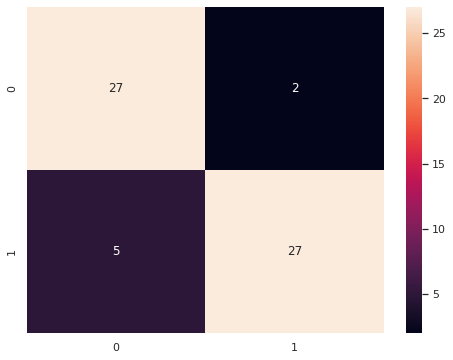

In [ ]:
y_fit=model.predict(X_test)
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test,y_fit), annot=True)
b, t = plt.ylim() 
b += 0.5 
t -= 0.5 
plt.ylim(b, t)
print(classification_report(y_test,y_fit))

# Ejemplo 2: clasificacion multicalse 
Objetivo: predecir entre 6 tipos de vridiros diferentes apartir de su composicion quimica 

Importmeos algunas de las librerias que nos seran de utilidad

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

Imortemos los datos desde el repositorio de github

In [ ]:
data=pd.read_csv('https://raw.githubusercontent.com/diplomado-bigdata-machinelearning-udea/Curso2/master/Datasets/glass.csv')

Inspeccionemos el dataset y sus características

In [ ]:
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [ ]:
data.shape

(214, 10)

In [ ]:
data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
RI      214 non-null float64
Na      214 non-null float64
Mg      214 non-null float64
Al      214 non-null float64
Si      214 non-null float64
K       214 non-null float64
Ca      214 non-null float64
Ba      214 non-null float64
Fe      214 non-null float64
Type    214 non-null int64
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


Ahora procedamos a analizar un poco el dataset con algunos gráficos simples que nos darán una idea del problema

(10.0, 0.0)

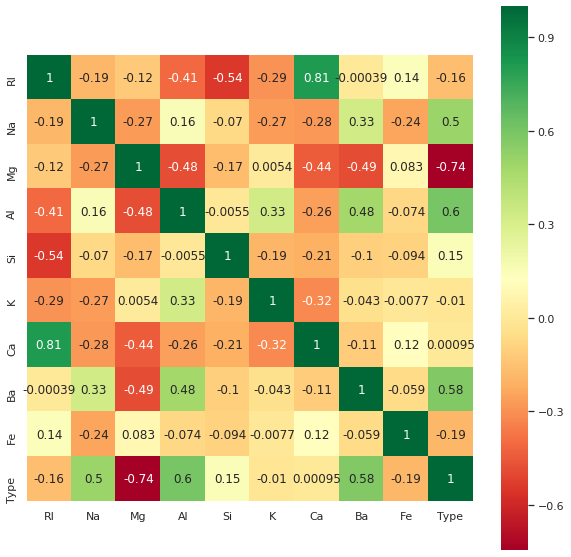

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn', square=True)
b, t = plt.ylim() 
b += 0.5 
t -= 0.5 
plt.ylim(b, t)

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64


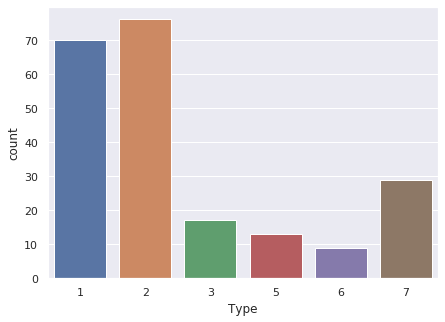

In [ ]:
print(data.Type.value_counts())
plt.figure(figsize=(7,5))
sns.countplot(x='Type', data=data);

In [ ]:
data.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

In [ ]:
data.dtypes

RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object

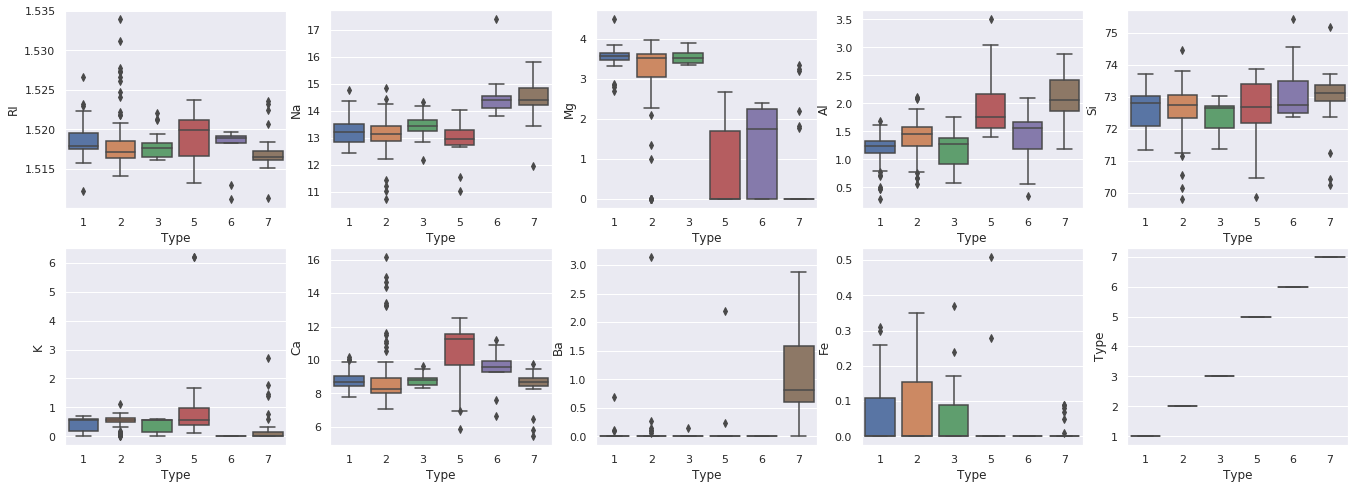

In [ ]:
fig, ax = plt.subplots(2,5, figsize=(23,8))
names=data.columns
for i , ax in enumerate(ax.flat):  
  sns.boxplot(data=data, x='Type', y=names[i] , orient='vertical' , ax=ax)

Como vemos hay varios Outliers. Identifiquemos y removamos estos Outliers usando el metodo del interquartile range (IQR)

In [ ]:
def IQR(x, value=1.5):
  Q1 = np.nanpercentile(x,25)
  Q3 = np.nanpercentile(x,75)
  IQR = Q3 - Q1
  upper = Q3 + value*IQR
  lower = Q1 - value*IQR
  x[x > upper] = np.nan
  x[x < lower] = np.nan
  return x

In [ ]:
for i in data.columns[:-1]:
  for j in data['Type'].unique():
    data.loc[data['Type']==j, i]=IQR(data.loc[data['Type']==j, i])

La estrategia implementada para remplazar estos Outliers sera usar el promedi

In [ ]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
for i in data['Type'].unique():  
  data.loc[data['Type']==i,'RI':'Fe']=imp.fit_transform(data.loc[data['Type']==i,'RI':'Fe'])

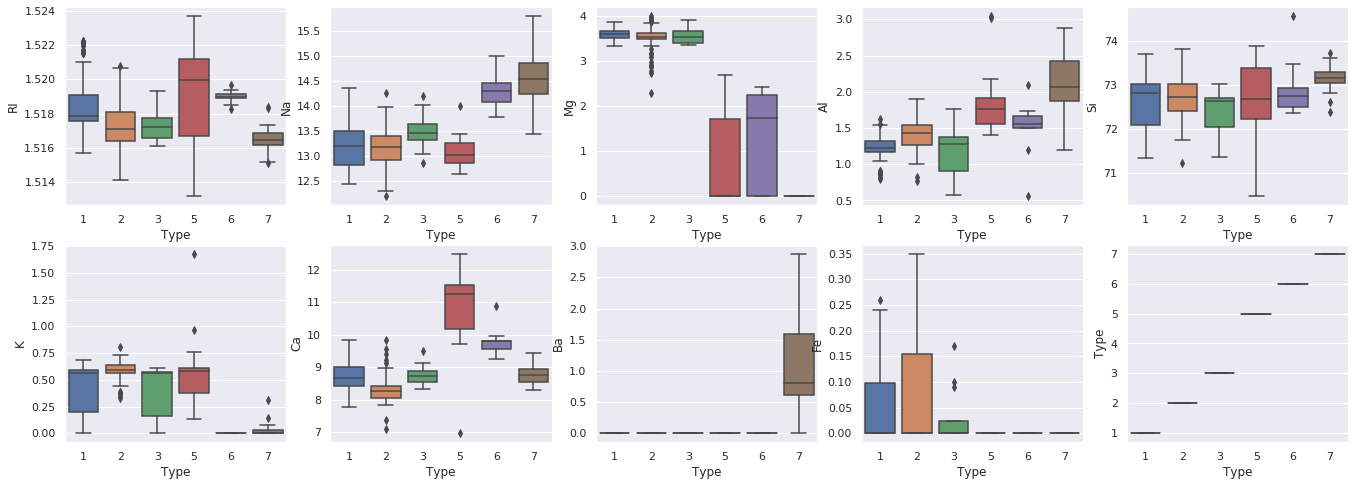

In [ ]:
fig, ax = plt.subplots(2,5, figsize=(23,8))
names=data.columns
for i , ax in enumerate(ax.flat):  
  sns.boxplot(data=data, x='Type', y=names[i] , orient='vertical' , ax=ax)

Como es usual separemos nuestro datos en entrenemaiento y testeo

In [ ]:
X=data.iloc[:,:-1]
y=data['Type']

In [ ]:
X.shape

(214, 9)

In [ ]:
X.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,3.583846,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.600000,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.550000,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,3.690000,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,3.620000,1.24,73.08,0.55,8.07,0.0,0.0


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42,stratify=y)

In [ ]:
X_train.shape

(171, 9)

Ahora procedamos a implementar nuestro modelo de redes neuronales. Usaremos validacion curazada y RandomSearchCv para buscar los hyperparametros de nuetro modelo 

In [ ]:
from tensorflow import keras

In [ ]:
keras.backend.clear_session()

In [ ]:
def build_model(n_neurons=55, n_hidden=2, input_shape=(9,)):
  model = keras.models.Sequential() # modelo secuencial de Keras
  model.add(keras.layers.Dense(n_neurons, activation='relu', input_shape=input_shape)) 
                      #Función de activación ReLU (Rectified Linear Unit), 55 neuronas en la capa oculta, 
                          #9 características de entrada, una por cada característica de los datos de entrada
  for i in range(n_hidden):
    model.add(keras.layers.Dense(n_neurons, activation='relu'))
  model.add(keras.layers.Dense(6, activation='softmax'))
  model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
  return model

In [ ]:
keras_cs = keras.wrappers.scikit_learn.KerasClassifier(build_fn=build_model, epochs=100, verbose=1)

In [ ]:
model =  Pipeline([
                   ('scale', StandardScaler()), ('ann', keras_cs)
])

In [ ]:
params = {
    'ann__n_hidden':[0,1,2,3],
    'ann__n_neurons':np.arange(45,60),
    'ann__batch_size':[10,15,20]
}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
rnd_search = RandomizedSearchCV(model, params, n_iter=50, n_jobs=-1, cv=3, scoring='accuracy')

In [ ]:
grid_result = rnd_search.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Train on 171 samples
Epoch 1/100
171/171 [==============================] - 0s 476us/sample - loss: 1.7455 - acc: 0.2105
Epoch 2/100
171/171 [==============================] - 0s 256us/sample - loss: 1.6525 - acc: 0.3450
Epoch 3/100
171/171 [==============================] - 0s 266us/sample - loss: 1.5667 - acc: 0.4678
Epoch 4/100
171/171 [==============================] - 0s 238us/sample - loss: 1.4945 - acc: 0.5322
Epoch 5/100
171/171 [==============================] - 0s 262us/sample - loss: 1.4245 - acc: 0.5205
Epoch 6/100
171/171 [==============================] - 0s 273us/sample - loss: 1.3478 - acc: 0.5614
Epoch 7/100
171/171 [==============================] - 0s 261us/sample - loss: 1.2742 - acc: 0.5789
Epoch 8/100
171/171 [==============================] - 0s 266us/sample - loss: 1.2069 - acc: 0.6082
Epoch 9/100
171/171 [==============================] - 0s 254us/sample - loss: 1.1474 - acc: 0.5906
Epoch 10/100
171/171 [==============================] - 0s 288us/sample - loss:

In [ ]:
grid_result.best_params_

{'ann__batch_size': 10, 'ann__n_hidden': 2, 'ann__n_neurons': 53}

In [ ]:
sk_params = {
    'batch_size':grid_result.best_params_['ann__batch_size'],
    'n_hidden': grid_result.best_params_['ann__n_hidden'],
    'n_neurons':grid_result.best_params_['ann__n_neurons']
}

In [ ]:
sk_params

{'batch_size': 10, 'n_hidden': 2, 'n_neurons': 53}

In [ ]:
keras.backend.clear_session()

In [ ]:
keras_cs = keras.wrappers.scikit_learn.KerasClassifier(build_fn=build_model, epochs=100 , verbose=1, **sk_params)

In [ ]:
model =  Pipeline([
                   ('scale', StandardScaler()), ('ann', keras_cs)
])

In [ ]:
model.fit(X_train,y_train)

Train on 171 samples
Epoch 1/100
171/171 [==============================] - 0s 499us/sample - loss: 1.7100 - acc: 0.4444
Epoch 2/100
171/171 [==============================] - 0s 263us/sample - loss: 1.6111 - acc: 0.6082
Epoch 3/100
171/171 [==============================] - 0s 249us/sample - loss: 1.5156 - acc: 0.6491
Epoch 4/100
171/171 [==============================] - 0s 231us/sample - loss: 1.4212 - acc: 0.6491
Epoch 5/100
171/171 [==============================] - 0s 298us/sample - loss: 1.3283 - acc: 0.6667
Epoch 6/100
171/171 [==============================] - 0s 308us/sample - loss: 1.2475 - acc: 0.6608
Epoch 7/100
171/171 [==============================] - 0s 278us/sample - loss: 1.1721 - acc: 0.6608
Epoch 8/100
171/171 [==============================] - 0s 247us/sample - loss: 1.1169 - acc: 0.6608
Epoch 9/100
171/171 [==============================] - 0s 363us/sample - loss: 1.0616 - acc: 0.6608
Epoch 10/100
171/171 [==============================] - 0s 264us/sample - loss:

Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('ann',
                 <tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7faf94b2afd0>)],
         verbose=False)

43/43 [==============================] - 0s 481us/sample
              precision    recall  f1-score   support

           1       0.67      0.91      0.77        11
           2       0.90      0.64      0.75        14
           3       0.50      0.67      0.57         3
           5       0.75      0.75      0.75         4
           6       1.00      0.67      0.80         3
           7       1.00      1.00      1.00         8

    accuracy                           0.79        43
   macro avg       0.80      0.77      0.77        43
weighted avg       0.82      0.79      0.79        43



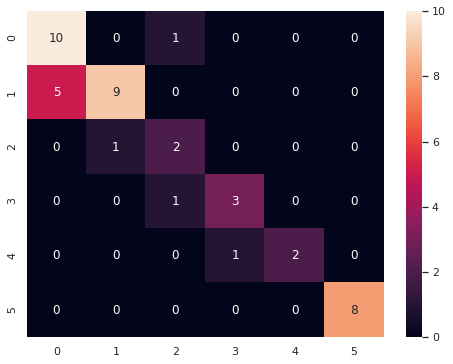

In [ ]:
y_fit=model.predict(X_test)
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test,y_fit), annot=True)
b, t = plt.ylim() 
b += 0.5 
t -= 0.5 
plt.ylim(b, t)
print(classification_report(y_test,y_fit))

Comparemos los resultados obtneido con un el modelo de regression SoftMax

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
model = Pipeline((
            ('scale', StandardScaler())  , ('log_reg', LogisticRegression( multi_class='multinomial', solver='lbfgs', C=30, max_iter=500, ))
))

In [ ]:
grid_params= {
    'log_reg__C':np.arange(1,50),
    'log_reg__class_weight':['balanced', None]
}

In [ ]:
grid_result = GridSearchCV(estimator=model, param_grid=grid_params, n_jobs=-1, cv=5)
grid_result.fit(X_train,y_train)
print(grid_result.best_params_)
model=grid_result.best_estimator_

{'log_reg__C': 1, 'log_reg__class_weight': None}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           1       0.69      1.00      0.81        11
           2       0.77      0.71      0.74        14
           3       0.00      0.00      0.00         3
           5       1.00      0.75      0.86         4
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         8

    accuracy                           0.81        43
   macro avg       0.74      0.74      0.74        43
weighted avg       0.78      0.81      0.79        43



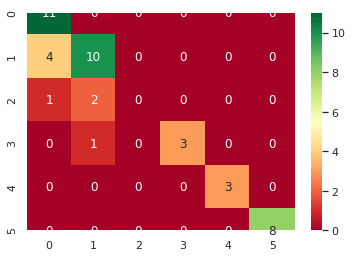

In [ ]:
model.fit(X_train,y_train)
y_fit=model.predict(X_test)
print(classification_report(y_test,y_fit))
sns.heatmap(confusion_matrix(y_test,y_fit), annot=True, cmap='RdYlGn')

# Ejemplo 3: Regression 
Objetivo: predecir el precio de casas en la ciuidad de california 

importemos algunas de las ligrerais que nos seran de utilidad


In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
import seaborn as sns; sns.set()

importemos el dataset usando keras

In [ ]:
housing = fetch_california_housing()

Inspeccionemos el dataset y sus características

In [ ]:
housing.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [ ]:
X = pd.DataFrame(housing.data, columns=housing.feature_names)
y = pd.Series(housing.target, name='Price')

In [ ]:
X.shape

(20640, 8)

In [ ]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [ ]:
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

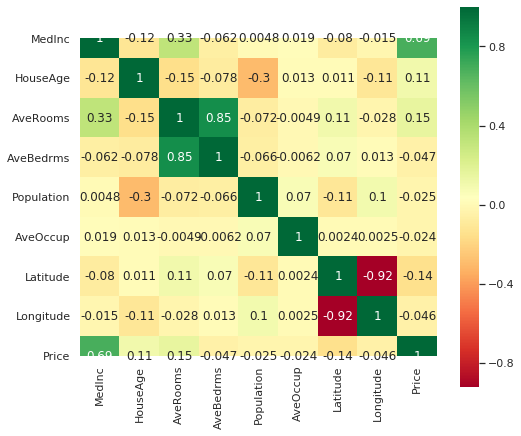

In [ ]:
plt.figure(figsize=(8,7))
sns.heatmap(X.join(y).corr(), square=True, annot=True, cmap='RdYlGn')

Separemos nuestros datos en un set de entrenamiento y otro de testeo

In [ ]:
X_train , X_test, y_train, y_test =  train_test_split(X,y, test_size=0.2)

In [ ]:
X_train.shape

(16512, 8)

Ahora procedamos a implementar nuestro modelo de redes neuronales. Usaremos validacion curazada y RandomSearchCv para buscar los hyperparametros de nuetro modelo 

In [ ]:
from tensorflow import keras

In [ ]:
keras.backend.clear_session()

In [ ]:
def build_model(n_neurons=5, n_hidden=2, input_shape=(8,)):
  model = keras.models.Sequential()
  model.add(keras.layers.Dense(n_neurons, activation='relu', input_shape=input_shape))
  for i in range(n_hidden):
    model.add(keras.layers.Dense(n_neurons, activation='relu'))
  model.add(keras.layers.Dense(1))
  model.compile(optimizer='sgd', loss='mean_squared_error')
  return model

In [ ]:
keras_cs = keras.wrappers.scikit_learn.KerasRegressor(build_fn=build_model, epochs=30, verbose=1, validation_split=0.5)

In [ ]:
model =  Pipeline([
                   ('scale', StandardScaler()), ('ann', keras_cs)
])

In [ ]:
params = {
    'ann__n_hidden':[0,1,2,3],
    'ann__n_neurons':np.arange(20,40),
    'ann__batch_size':[10,15,20,25]
}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
rnd_search = RandomizedSearchCV(model, params, n_iter=10, n_jobs=-1, cv=3)

In [ ]:
grid_result = rnd_search.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Train on 8256 samples, validate on 8256 samples
Epoch 1/30
8256/8256 [==============================] - 3s 391us/sample - loss: 1.5569 - val_loss: 0.5057
Epoch 2/30
8256/8256 [==============================] - 3s 381us/sample - loss: 0.4399 - val_loss: 11.6794
Epoch 3/30
8256/8256 [==============================] - 3s 377us/sample - loss: 1.1178 - val_loss: 0.6253
Epoch 4/30
8256/8256 [==============================] - 3s 378us/sample - loss: 0.4662 - val_loss: 0.4139
Epoch 5/30
8256/8256 [==============================] - 3s 386us/sample - loss: 0.4707 - val_loss: 0.9279
Epoch 6/30
8256/8256 [==============================] - 3s 380us/sample - loss: 0.5470 - val_loss: 0.3828
Epoch 7/30
8256/8256 [==============================] - 3s 387us/sample - loss: 0.3995 - val_loss: 0.3775
Epoch 8/30
8256/8256 [==============================] - 3s 380us/sample - loss: 0.3774 - val_loss: 0.3523
Epoch 9/30
8256/8256 [==============================] - 3s 378us/sample - loss: 0.3606 - val_loss: 0.36

In [ ]:
grid_result.best_params_

{'ann__batch_size': 10, 'ann__n_hidden': 1, 'ann__n_neurons': 27}

In [ ]:
sk_params = {
    'batch_size':grid_result.best_params_['ann__batch_size'],
    'n_hidden': grid_result.best_params_['ann__n_hidden'],
    'n_neurons':grid_result.best_params_['ann__n_neurons']
}

In [ ]:
sk_params

{'batch_size': 10, 'n_hidden': 1, 'n_neurons': 27}

In [ ]:
keras.backend.clear_session()

In [ ]:
keras_cs = keras.wrappers.scikit_learn.KerasRegressor(build_fn=build_model, epochs=20 , verbose=0, **sk_params)

In [ ]:
model =  Pipeline([
                   ('scale', StandardScaler()), ('ann', keras_cs)
])

In [ ]:
model.fit(X_train, y_train);
y_fit = model.predict(X_test);
print(mean_squared_error(y_test,y_fit))
r2_score(y_test, y_fit )

0.30806602270209443


0.7655696445677386

Comparemos ahora el desempeño de nuestro red neuronal modelo con un regresion lineal 

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model =  Pipeline([
                   ('scale', StandardScaler()), ('linear_model', LinearRegression())
])

In [ ]:
model.fit(X_train,y_train)
y_fit =  model.predict(X_test)
print(mean_squared_error(y_test,y_fit))
r2_score(y_test,y_fit)

0.5228432049485254


0.6021297081179469

#Ejercicio Clasificación biclase
En éste ejercicio usaremos una red densa para hacer una clasificación biclase para el sentimiento de la reseña de películas de la base de datos IMDB, con label 0 (negativo) y 1 (positivo).

En el dataset se encuentran una reseña en texto para una película así como su sentimiento, la idea es construír un clasificador capaz de diferenciar reseñas positivas de negativas:

Bebe construír su modelo de la siguiente manera


1.   Importe las librerías necesarias (ya lo hemos hecho )
2.   Importe los datos de la base de datos del IMDB disponibles en Kereas (También lo hemos hecho.)
3.   Cree una red con tres capas: keras.layers.Embedding, ésta capa se encarga de codificar el texto (como el Tf-iDF en el curso 1).
  keras.layers.GlobalAveragePooling1D, ésta capa se encarga de promediar los valores de los vectores envevidos en la capa anterior para extraer la información relevante, y keras.layers.Dense que constará de una sola neurona (0 o 1) y una activación sigmoidal para la clasificación biclase.
4.  Compile el modelo usando entropía cruzada binaria como perdida y un optimizador 'adam', el cual es una forma modificada del SDG (optimizer='adam',loss='binary_crossentropy'), use 10 épocas
5.   Entrene su modelo y evalue la perdida y el accuracy. No olvide que los datos deben ser particionados en datos de entrenamiento y prueba.



In [ ]:
!pip install --upgrade tensorflow
!pip install --upgrade tensorflow-gpu

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
!pip install -q tensorflow-datasets
!pip install -q seaborn
import tensorflow_datasets as tfds
from tensorflow import keras
import numpy as np
import pathlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

tfds.disable_progress_bar()
print(tf.__version__)

In [ ]:
#cargue la base de datos 

(train_data, test_data), info = tfds.load(
    'imdb_reviews/subwords8k', 
    split = (tfds.Split.TRAIN, tfds.Split.TEST),
    as_supervised=True,
    with_info=True)
)


#prepare los datos para entrenar una red densa

BUFFER_SIZE = 1000

train_batches = (
    train_data
    .shuffle(BUFFER_SIZE)
    .padded_batch(32, train_data.output_shapes))

test_batches = (
    test_data
    .padded_batch(32, train_data.output_shapes))

In [ ]:
#@title Solución
#cree una red 
encoder = info.features['text'].encoder 
#ésta será la función encargada de codificar el texto en formato numerico para ser usado en la red.
#se usa el encoder como parte de una capa
#la capa GlobalAveragePooling hará un promedio de los vectores en el texto enbebido para extraer la información relevante.
#Una capa densa con una sola neurona. Ésta neurona será actvada o desactivada (1/0) dependiendo de las entradas en la red.

model = keras.Sequential([
  keras.layers.Embedding(encoder.vocab_size, 16),
  keras.layers.GlobalAveragePooling1D(),
  keras.layers.Dense(1, activation='sigmoid')])

model.summary()


#compile el modelo
 #adam es una forma optima del SDG
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

#entrene el modelo
history = model.fit(train_batches,
                    epochs=10,
                    validation_data=test_batches,
                    validation_steps=30)
#evalue el  modelo
loss, accuracy = model.evaluate(test_batches)
print("Loss: ", loss)
print("Accuracy: ", accuracy)

# Ejercicio Clasificación multiclase

En éste caso usaremos la base de datos CIFAR10, la cual consta de imagenes a color, constituidas por 10 clases de objeto: ['airplanes', 'cars', 'birds', 'cats', 'deer', 'dogs', 'frogs', 'horses', 'ships', 'trucks']. Construirémos de nuevo una red densa para crear un clasificador de imagenes. 
Recuerde que la idea es generar un flujo de trabajo desde la carga de los datos hasta la evaluación del modelo.

1.  Realice la carga de los datos del CIFAR10 de Keras y normalice los datos. Recuerde que al ser imagenes los valores de los pixeles estarán entre 0 y 255.
2.  Visualice algunas imagenes de muestra y su label respectivo. Recuerde usar la función imshow del matplotlib.pyplot.
3.  Cree un modelo con 4 capas, keras.layers.Flatten, ésta es la capa de entrada y deberá recibir imagenes de 32x32 pixeles y 3 canales de color. Añada 2 capas densas con activación relu y 256 y 128 neuronas respectivamente, finalmente una capa densa de 10 neuronas (el numero de clases del dataset) y con una activación softmax encargada de distribuir las densidad de probabilidad entre todos los labels
4.  Recuerde compilar el modelo antes de entrenar. Hágalo con una sparse_categorical_crossentropy como función de perdida y de nuevo un optimizador adam.
5. Entrene y evalúe el modelo (recuerde usar datos diferentes para cada una de éstas tareas).
6.  Finalmente grafique de nuevo las imagenes como en el punto 2. pero ahora con la etiqueta determinada por la red.


In [ ]:
import tensorflow as tf

In [ ]:
#cargar el dataset
cifar10 = tf.keras.datasets.cifar10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

#normalice los datos
train_images = train_images / 255.0
test_images = test_images / 255.0

170498071/170498071 [==============================] - 17s 0us/step


In [ ]:
train_images.shape

(50000, 32, 32, 3)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

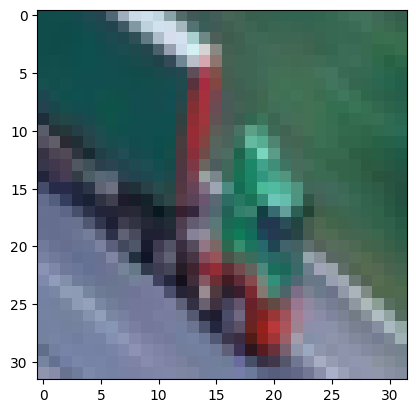

In [ ]:
plt.imshow(train_images[50])

In [ ]:
train_labels[50]

array([9], dtype=uint8)

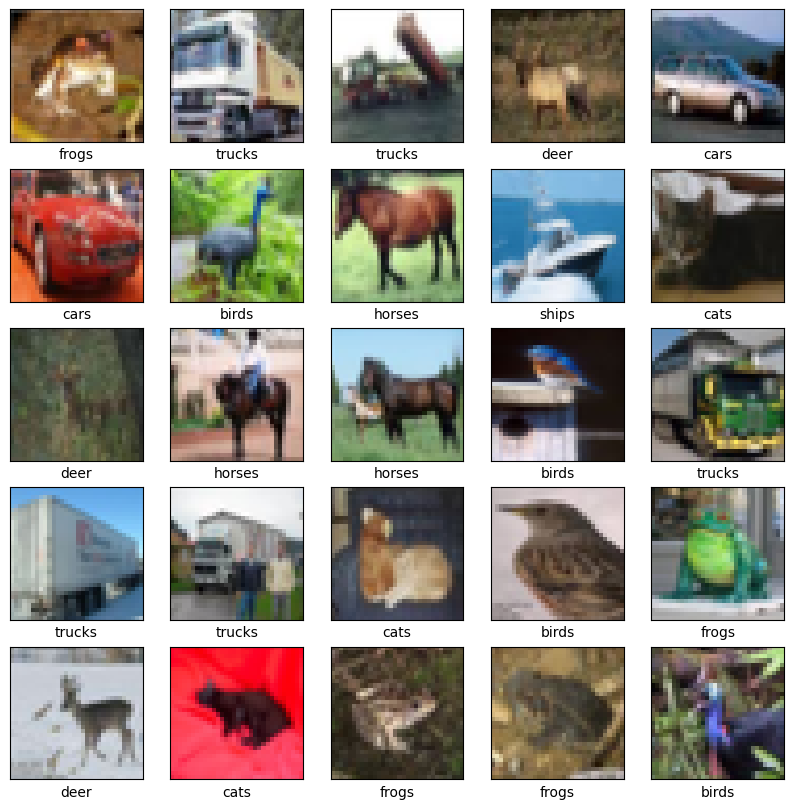

In [ ]:
#@title Solución
#Visualice una muestra
class_names = ['airplanes', 'cars', 'birds', 'cats', 'deer', 'dogs', 'frogs', 'horses', 'ships', 'trucks']
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()



In [ ]:
#construya el modelo
#32x32x3 son las dimensiones de las imagenes que serán puestas en un solo vector por ésta capa para poder ser usadas en la capa densa.
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32, 3)), 
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
    #note que ha cambiado la función de activación en la última capa, no en las intermedias

#compile el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

NameError: name 'keras' is not defined

In [ ]:
#entrene el modelo
model.fit(train_images, train_labels, epochs=10)

#evaluelo
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

#prediga
predictions = model.predict(test_images)
#grafique
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i])
    plt.xlabel(class_names[test_labels[i][0]])
plt.show()

Note que las capas críticas en la red son:
las primeras encargadas de codificar los datos de una manera adecuada para la red. 
En el caso del texto usamos una red que codifica las palabras como vectores numéricos (igual que el caso del curso 1) y en las imagenes usamos una capa que aplana las imagenes como un vector para ingresarlo a la redy las capas finales que se diferencian por la función de activación y el numero de neuronas en la capa, ésto debe ser representativo del problema que  queremos solucionar.

Las capas intermedias son las encargadas de extraer la información de nuestros datos y la importancia de su variedad será evidente en ejercicios posteriores.